# Life Expectancy Project (Preprocessing file):

In [38]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import skimpy 
from skimpy import skim
import ptitprince as pt
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
import numpy as np

In [39]:
df = pd.read_csv("LE_Dataset.csv")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [41]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [42]:
strs=["Country", "Status"]
df=df.astype({i:"string" for i in strs})

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   string 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   string 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [44]:
df_exclude=df.select_dtypes(exclude=["string"]) 

In [53]:
skew_res= df_exclude.skew()
skew_res

Year                               -0.006409
Life expectancy                    -0.638605
Adult Mortality                     1.174369
infant deaths                       9.786963
Alcohol                             0.589563
percentage expenditure              4.652051
Hepatitis B                        -1.930845
Measles                             9.441332
 BMI                               -0.219312
under-five deaths                   9.495065
Polio                              -2.098053
Total expenditure                   0.618686
Diphtheria                         -2.072753
 HIV/AIDS                           5.396112
GDP                                 3.206655
Population                         15.916236
 thinness  1-19 years               1.711471
 thinness 5-9 years                 1.777424
Income composition of resources    -1.143763
Schooling                          -0.602437
dtype: float64

In [54]:
lst= skew_res.tolist()
names= df_exclude.columns
names

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [47]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2938   │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 22     │ │ int32       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year        │   0 │     0 │     2008 │    4.614 │  2000 │   2004 │    2008 │    2012 │       2015 │ ▇▅▇▅▇▇ │  │
│ │ Life        │  10 │  0.34 │    69.22 │    9.524 │  36.3 │   63.1 │    72.1 │    75.7 │         89 │  ▁▃▅▇▂ │  │
│ │ expectancy  │     │       │          │          │       │        │         │         │            │        │  │
│ │ Adult       │  10 │  0.34 │    164.8 │    124.3 │     1 │     74 │     144 │     228 │        723 │  ▇▇▃▁  │  │
│ │ Mortality   │     │       │          │          │       │        │         │         │            │        │  │
│ │ infant      │   0 │     0 │     30.3 │    117.9 │     0 │      0 │       3 │      22 │       1800 │   ▇    │  │
│ │ deaths      │     │       │          │          │       │        │         │         │            │        │  │
│ │ Alcohol     │ 194 │   6.6 │    4.603 │    4.052 │  0.01 │ 0.8775 │   3.755 │   7.703 │      17.87 │ ▇▃▃▂▁  │  │
│ │ percentage  │   0 │     0 │    738.3 │     1988 │     0 │  4.685 │   64.91 │   441.5 │      19480 │   ▇    │  │
│ │ expenditure │     │       │          │          │       │        │         │         │            │        │  │
│ │ Hepatitis B │ 553 │ 18.82 │    80.94 │    25.07 │     1 │     77 │      92 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Measles     │   0 │     0 │     2420 │    11470 │     0 │      0 │      17 │   360.2 │     212200 │   ▇    │  │
│ │  BMI        │  34 │  1.16 │    38.32 │    20.04 │     1 │   19.3 │    43.5 │    56.2 │       87.3 │ ▃▆▃▇▃  │  │
│ │ under-five  │   0 │     0 │    42.04 │    160.4 │     0 │      0 │       4 │      28 │       2500 │   ▇    │  │
│ │ deaths      │     │       │          │          │       │        │         │         │            │        │  │
│ │ Polio       │  19 │  0.65 │    82.55 │    23.43 │     3 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Total       │ 226 │  7.69 │    5.938 │    2.498 │  0.37 │   4.26 │   5.755 │   7.492 │       17.6 │  ▂▇▆▂  │  │
│ │ expenditure │     │       │          │          │       │        │         │         │            │        │  │
│ │ Diphtheria  │  19 │  0.65 │    82.32 │    23.72 │     2 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │  HIV/AIDS   │   0 │     0 │    1.742 │    5.078 │   0.1 │    0.1 │     0.1 │     0.8 │       50.6 │   ▇    │  │
│ │ GDP         │ 448 │ 15.25 │     7483 │    14270 │ 1.681 │  463.9 │    1767 │    5911 │     119200 │   ▇▁   │  │
│ │ Population  │ 652 │ 22.19 │ 12750000 │ 61010000 │   

In [62]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Adult Mortality_transformed
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.883843
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.930034
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.912807
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.935752
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.952832


In [63]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Adult Mortality_transformed
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,2.810333
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,2.784425
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,-0.635887
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,2.689061
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8,2.618525


In [67]:
for i, j in zip(names, lst):
    if j <0.5:
        df[i].fillna(df[i].mean(), inplace=True)
    else:
        # # For skewed columns
        # # Applying Yeo-Johnson transformation to handle both positive and negative values
        # pts = PowerTransformer(method='yeo-johnson')

        # # Applying transformation only to non-missing values
        # transformed_data = pts.fit_transform(df_exclude[[i]].dropna())

        # # Create a new column to store transformed data
        # df_exclude[f'{i}_transformed'] = np.nan
        # df_exclude.loc[~df_exclude[i].isnull(), f'{i}_transformed'] = transformed_data[:, 0]

        # Filling missing values with median of transformed data
        df_exclude[i].fillna(df_exclude[i].median(), inplace=True)

        # # Reverse transforming the filled values to original scale
        # df_exclude[i] = pts.inverse_transform(df[[f'{i}_transformed']])

        print(f'Filled missing values in {i} with median (skewed distribution)')

        # # Drop the temporary transformed column
        # df_exclude.drop(columns=[f'{i}_transformed'], inplace=True)

Filled missing values in Adult Mortality with median (skewed distribution)
Filled missing values in infant deaths with median (skewed distribution)
Filled missing values in Alcohol with median (skewed distribution)
Filled missing values in percentage expenditure with median (skewed distribution)
Filled missing values in Measles  with median (skewed distribution)
Filled missing values in under-five deaths  with median (skewed distribution)
Filled missing values in Total expenditure with median (skewed distribution)
Filled missing values in  HIV/AIDS with median (skewed distribution)
Filled missing values in GDP with median (skewed distribution)
Filled missing values in Population with median (skewed distribution)
Filled missing values in  thinness  1-19 years with median (skewed distribution)
Filled missing values in  thinness 5-9 years with median (skewed distribution)


C:\Users\iraha\AppData\Local\Temp\ipykernel_16328\4225012750.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)
C:\Users\iraha\AppData\Local\Temp\ipykernel_16328\4225012750.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [52]:
def fill_missing_values(df, lst, names):
    # Step 1: Check skewness of each column
    skewness = df.apply(lambda x: skew(x.dropna()), axis=0)
    
    for column in df.columns:
        if df[column].isnull().sum() > 0:  # Only process columns with missing values
            if abs(skewness[column]) < 0.5:
                # For normally distributed columns
                df[column].fillna(df[column].mean(), inplace=True)
                print(f'Filled missing values in {column} with mean (normal distribution)')
            else:
                # For skewed columns
                # Applying Yeo-Johnson transformation to handle both positive and negative values
                pt = PowerTransformer(method='yeo-johnson')
                
                # Applying transformation only to non-missing values
                transformed_data = pt.fit_transform(df[[column]].dropna())
                
                # Create a new column to store transformed data
                df[f'{column}_transformed'] = np.nan
                df.loc[~df[column].isnull(), f'{column}_transformed'] = transformed_data[:, 0]
                
                # Filling missing values with median of transformed data
                df[f'{column}_transformed'].fillna(df[f'{column}_transformed'].median(), inplace=True)
                
                # Reverse transforming the filled values to original scale
                df[column] = pt.inverse_transform(df[[f'{column}_transformed']])
                
                print(f'Filled missing values in {column} with median (skewed distribution)')
                
                # Drop the temporary transformed column
                df.drop(columns=[f'{column}_transformed'], inplace=True)
    
    return df

dft = pd.DataFrame(df_exclude)

# Fill missing values
df_filled = fill_missing_values(dft)

print("\nFilled DataFrame:")
print(df_filled)

C:\Users\iraha\AppData\Local\Temp\ipykernel_16328\397502152.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[f'{column}_transformed'].fillna(df[f'{column}_transformed'].median(), inplace=True)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Life expectancy _transformed
Feature names seen at fit time, yet now missing:
- Life expectancy 


In [ ]:
ptr = PowerTransformer(method='yeo-johnson')
skewed_columns = df.columns[df.skew().abs() > 0.5]  # Adjust threshold based on your needs

df[skewed_columns] = pt.fit_transform(df[skewed_columns])

C:\Users\iraha\AppData\Local\Temp\ipykernel_16328\258784365.py:2: FutureWarning: <class 'pandas.core.arrays.string_.StringArray'>._reduce will require a `keepdims` parameter in the future
  skewed_columns = df.columns[df.skew().abs() > 0.5]  # Adjust threshold based on your needs


TypeError: Cannot perform reduction 'skew' with string dtype

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

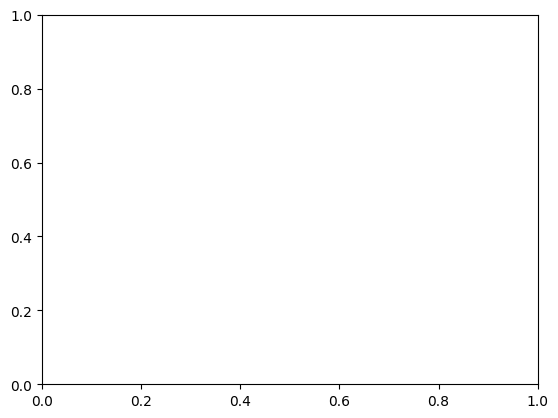

In [ ]:
pt.RainCloud(df, x="country", y="")